In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [4]:
train_dir = '/content/drive/MyDrive/dataset/shipper/train'
validation_dir = '/content/drive/MyDrive/dataset/shipper/test'

In [5]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 122 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 33s - loss: 0.6832 - accuracy: 0.5816 - val_loss: 0.1353 - val_accuracy: 1.0000
Epoch 2/20
25/25 - 12s - loss: 0.3693 - accuracy: 0.8700 - val_loss: 0.2452 - val_accuracy: 1.0000
Epoch 3/20
25/25 - 7s - loss: 0.2776 - accuracy: 0.9400 - val_loss: 0.3030 - val_accuracy: 0.8500
Epoch 4/20
25/25 - 7s - loss: 0.2669 - accuracy: 0.8776 - val_loss: 0.0961 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 6s - loss: 0.0425 - accuracy: 0.9898 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 6/20
25/25 - 6s - loss: 0.2728 - accuracy: 0.9286 - val_loss: 0.0815 - val_accuracy: 1.0000
Epoch 7/20
25/25 - 6s - loss: 0.0988 - accuracy: 0.9592 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 8/20
25/25 - 6s - loss: 0.0820 - accuracy: 0.9796 - val_loss: 0.2271 - val_accuracy: 0.9500
Epoch 9/20
25/25 - 6s - loss: 0.0634 - accuracy: 0.9694 - val_loss: 0.0901 - val_accuracy: 0.9500
Epoch 10/20
25/25 - 6s - loss: 0.0275 - accuracy: 0.9900 - val_loss: 0.1897 - val_accuracy: 0.9500
Epoch 11/20
25/25

Saving dancow.png to dancow.png
dancow.png
susu bubuk/lama expired


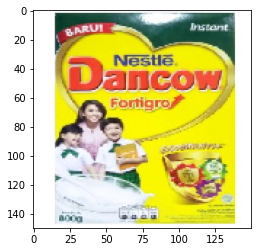

In [9]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('roti/cepat expired')
  else:
    print('susu bubuk/lama expired')

Saving sari roti.png to sari roti.png
sari roti.png
roti/cepat expired


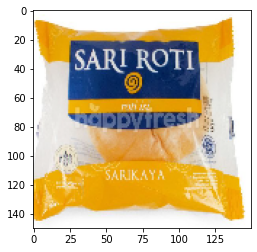

In [10]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('roti/cepat expired')
  else:
    print('susu bubuk/lama expired')